In [1]:
import pandas as pd
import numpy as np


In [3]:
df  = pd.read_csv('train_data.csv')
df1 = pd.read_csv('test_data.csv') 

print(df.shape)
print(df1.shape)

(42000, 785)
(28000, 784)


In [5]:
x = df.drop('label', axis=1)
y = df.label

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [9]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
x = x.reshape((42000, 28, 28, 1))
x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [35]:
x1 = np.array(df1)
x1 = scaler.fit_transform(x1)
x1 = x1.reshape((28000, 28, 28, 1))
x1

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [39]:
y = np.array(y)
from sklearn.preprocessing import OneHotEncoder
env= OneHotEncoder(sparse_output=False)
y= y.reshape((-1,1))
y= env.fit_transform(y)
y


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau



In [94]:
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same',
                 activation='relu',input_shape =(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))          

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

C:\Users\dhava\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 97ms/step - accuracy: 0.8324 - loss: 0.5007 - val_accuracy: 0.9855 - val_loss: 0.0467
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 69s 105ms/step - accuracy: 0.9771 - loss: 0.0762 - val_accuracy: 0.9900 - val_loss: 0.0290
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 68s 104ms/step - accuracy: 0.9838 - loss: 0.0534 - val_accuracy: 0.9927 - val_loss: 0.0242
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 71s 108ms/step - accuracy: 0.9864 - loss: 0.0446 - val_accuracy: 0.9949 - val_loss: 0.0157
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - accuracy: 0.9895 - loss: 0.0380 - val_accuracy: 0.9973 - val_loss: 0.0084
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 71s 108ms/step - accuracy: 0.9914 - loss: 0.0325 - val_accuracy: 0.9965 - val_loss: 0.0096
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.9963 - val_loss: 0.0118
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 70s 107ms/step - accuracy: 0.9916 - loss: 0.

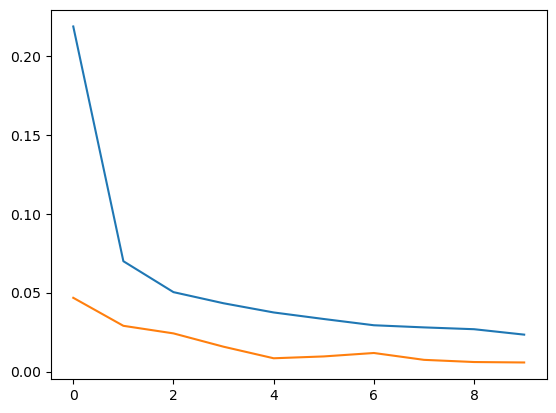

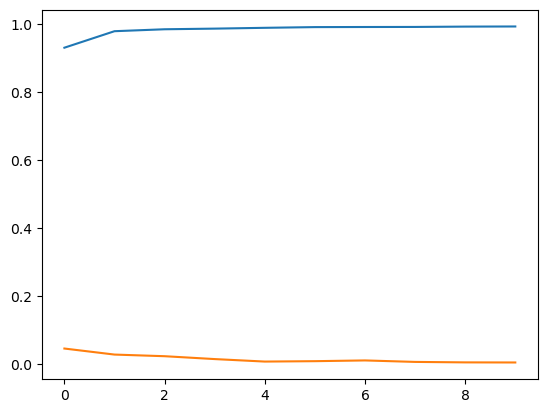

In [96]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x,y,batch_size=64, epochs=10, validation_data=(x_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])



In [97]:
predictions = model.predict(x1)
pre = predictions.argmax(axis=-1)

pre

875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [106]:
submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("final_submission_v1.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [108]:
prediction= model.predict(x)
pre = prediction.argmax(axis=-1)



1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step
